In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_DF = pd.read_csv("/content/drive/MyDrive/dataset/UniversalBank.csv",  header = "infer")


In [3]:
bank_DF.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_DF_Dummy = pd.get_dummies(bank_DF)


In [6]:
bank_DF.isnull().sum().sort_index()/len(bank_DF)


Age                   0.0
CCAvg                 0.0
CD Account            0.0
CreditCard            0.0
Education             0.0
Experience            0.0
Family                0.0
ID                    0.0
Income                0.0
Mortgage              0.0
Online                0.0
Personal Loan         0.0
Securities Account    0.0
ZIP Code              0.0
dtype: float64

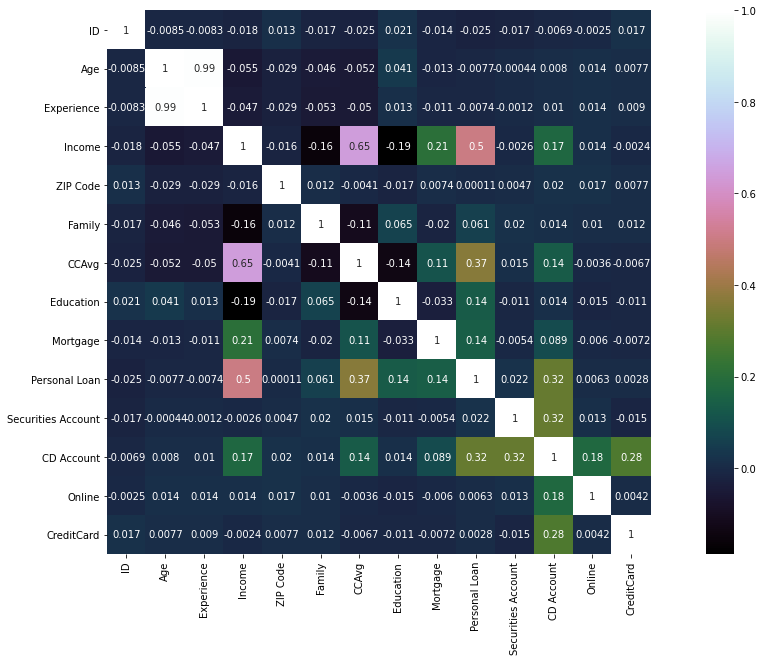

In [7]:
# GETTING Correllation matrix
corr_mat=bank_DF.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [8]:
y = bank_DF_Dummy["Personal Loan"]
x = bank_DF_Dummy.drop(["Personal Loan", "ID", "ZIP Code"], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [10]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

In [12]:
# import modules as necessary
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:

# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1
)

In [14]:
# Train model
%time Adaboost_model.fit(x_train, y_train)

CPU times: user 3.21 s, sys: 0 ns, total: 3.21 s
Wall time: 3.25 s


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [15]:
# Predict on Test 
y_preds = Adaboost_model.predict(x_test)

In [16]:
# Verify accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))

0.983


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=4)

In [18]:
# Train model
%time Adaboost_model_clf.fit(x_train, y_train)

CPU times: user 894 ms, sys: 78 ms, total: 972 ms
Wall time: 27.6 s


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [19]:
# Find best model
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.98675 {'learning_rate': 0.1, 'n_estimators': 100}


In [20]:
y_pred_test=best_ada_model.predict(x_test)


In [21]:
print(accuracy_score(y_test,y_pred_test))


0.984


In [22]:
# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 100,
    learning_rate = 0.1
)

%time Adaboost_model.fit(x_train, y_train)

# Predict on Test 
y_preds_train = Adaboost_model.predict(x_train)
y_preds_test = Adaboost_model.predict(x_test)

print("Train Accuracy", accuracy_score(y_train, y_preds_train))
print("Test Accuracy", accuracy_score(y_test, y_preds_test))

CPU times: user 527 ms, sys: 0 ns, total: 527 ms
Wall time: 531 ms
Train Accuracy 0.99375
Test Accuracy 0.984
